In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
c = 4
def f(r, R, alpha):
    if isinstance(r, (int, float)):
        if r<0.1*R:
            a = alpha/c + alpha*(c-1)/c*10*r;
        else:
            a = alpha*np.max([1, r/R]);
        # elif r < R:
        #     a = alpha;
        # else:
        #     a = alpha*r/R;
    # else:
    #     ones = np.ones(len(r));
    #     if r<0.1R:
    #         a = alpha/4;
    #     elif r < R:
    #         a = alpha;
    #     else:
    #         a = alpha*r/R;
    #     a = alpha*np.maximum(ones, r/R);
    return a

def g_arr(r, R=1, dr_c=0.05, dr_s=0.005, alpha=0.05, b=1):
    g1 = dr_s + (dr_c - dr_s)*(1-r/R)**b;
    g2 = dr_s + (2*alpha*R - dr_s)*(r/R - 1);
    g = r*0;
    g[r<R] = g1[r<R];
    g[r>=R] = g2[r>R];
    gmax = alpha*r/R;
    res = g;
    res[r>R] = np.minimum(res[r>R], gmax[r>R]);
    return res

def g_loop(r, R=1, dr_c=0.05, dr_s=0.005, alpha=0.05, b=1):
    if r<R:
        g = dr_s + (dr_c - dr_s)*(1-r/R)**b;
    else:
        g = np.amin([dr_s + (2*alpha*R - dr_s)*(r/R - 1),
                    alpha*r/R]);
    return g

def g_inv(r, R=1, dr_c=0.05, dr_s=0.005, alpha=0.05, b=1):
    if r<R:
        g = R*(1 - ((r - dr_s)/(dr_c - dr_s))**(1/b));
    else:
        g = np.amax([R*((r - dr_s)/(2*alpha*R - dr_s) + 1),
                    R*r/alpha])
    return g
    
def g_inv_arr(r, R=1, dr_c=0.05, dr_s=0.005, alpha=0.05, b=1):
    g1 = R*(1 - ((r - dr_s)/(dr_c - dr_s))**(1/b));
    g2 = R*((r - dr_s)/(2*alpha*R - dr_s) + 1);
    g = r*0;
    g[r<R] = g1[r<R];
    g[r>=R] = g2[r>R];
    gmin = alpha*r/R;
    res = g;
    res[r>R] = np.maximum(res[r>R], gmin[r>R]);
    return res

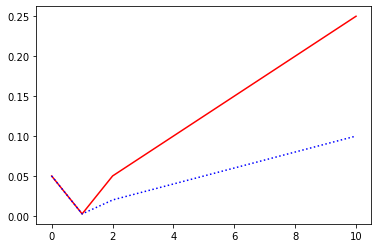

In [6]:
N = 1000;
r = np.linspace(0,10,N);
f = g_arr(r, 1, 0.05, 0.0025, 0.025, 1);
f1 = g_arr(r, 1, 0.05, 0.0025, 0.01, 1);
f_inv = 1/f;
g_i = g_inv_arr(r)
plt.plot(r,f, 'r-', markersize=1)
plt.plot(r,f1, 'b:', markersize=1)

In [10]:
a = g_loop(10, 1, 0.05,0.005,0.05)
print(a)
a = 1/g_loop(a,1,0.05,0.005,0.05)
print(a)

0.5
36.36363636363636


In [11]:
def CDF_f(x):
    R = 1
    dr_c = 0.05
    dr_s = 0.005
    alpha = 0.05
    res, error = integrate.quad(g_inv, 0, x, args=(R,dr_c,dr_s,alpha))
    return res
def CDF_arr(x):
    res = np.zeros(len(x))
    for i in range(len(x)):
        R = 1
        dr_c = 0.05
        dr_s = 0.005
        alpha = 0.05
        t_res, error = integrate.quad(g_inv, 0, x[i], args=(R,dr_c,dr_s,alpha))
        res[i] = t_res;
    return res

norm = CDF_f(40)
pdf = g_arr(r)
cdf = CDF_arr(r)

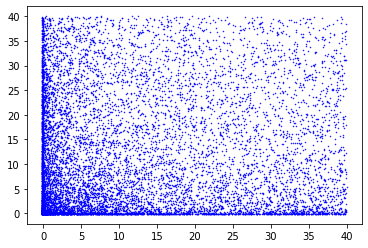

In [12]:
N = 10000
U_x = np.random.uniform(size=N)
U_y = np.random.uniform(size=N)
#plt.plot(U_x,U_y, 'b.', markersize=1)
#plt.show()
F_x = CDF_arr(U_x)
F_y = CDF_arr(U_y)
norm = CDF_f(np.amax(U_x))
F_x, F_y = F_x/norm*40, F_y/norm*40
plt.plot(F_x,F_y, 'b.', markersize=1)
plt.show()

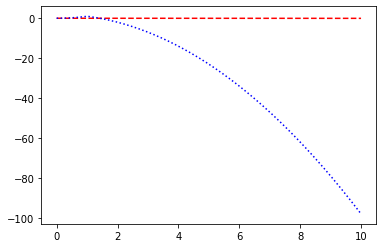

In [13]:
# plt.plot(r,pdf, 'r--')
# plt.plot(r,cdf, 'b:')
# plt.show()
plt.plot(r,pdf/norm, 'r--')
plt.plot(r,cdf/norm, 'b:')
plt.show()


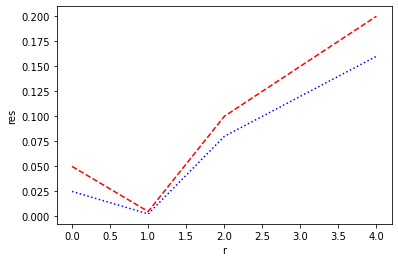

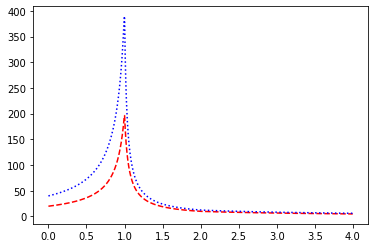

In [14]:
N = 1000
r = np.linspace(0,4,N)
gg = g_arr(r, 1, 0.05, 0.005, 0.05, 1)
gg1 = g_arr(r, 1, 0.025, 0.0025, 0.04, 1)
# x = np.linspace(0,4,N);
# y = np.zeros(N)
# for i in range(N):
#     y[i] = g_loop(x[i], 1, 0.05, 0.01, 0.05, 2)  
plt.plot(r,gg, 'r--');
plt.plot(r, gg1, 'b:', markersize=0.25);
#plt.plot(x,y, 'b.', markersize=0.25);
plt.xlabel("r");
plt.ylabel('res');
plt.savefig("resolution")
plt.show() 
plt.plot(r,1/gg, 'r--')
plt.plot(r, 1/gg1, 'b:')
plt.show()

In [15]:
def make_grid(r_M, R, alpha):
    N = int(np.pi/alpha**2*R**2*(2*np.log(r_M/R) + R));
    r_0 = f(0, R, alpha)/8;
    t_0 = np.pi/2;
    r = np.zeros(N+1);
    dr = np.zeros(N);
    t = np.zeros(N+1);
    r[0], t[0] = r_0, t_0;
    print(r[0])
    for i in range(N):
        r_i = r[i];
        t_i = t[i];
        r_1 = r_i + f(r_i, R, alpha)**2/(2*np.pi*r_i);
        t_1 = t_i + f(r_i, R, alpha)/r_i;
        r[i+1], t[i+1] = r_1, t_1;
        dr[i] = r[i+1] - r[i]
    x = r*(np.cos(t));
    y = r*(np.sin(t));
    return x, y, r, dr
 
x, y, r, dr = make_grid(40, 1, 0.05);
# idx = np.where(y>0.01);
# y_p = y[idx];
# y_n = -y[idx];
# x = x[idx];
# y = np.append(y_p, y_n);
# x = np.append(x, x);
        
r_int = r[np.where(r<1)]
res = np.sqrt(len(r)/np.pi)

print("""Total cells = {:n}, interior to star = {:n}, 
effective resolution = {:f}""".format(len(r), len(r_int), res))
#print(min(dr))
plt.plot(x,y, 'r.', markersize=3);
plt.xlim(-0.5,0.5);
plt.ylim(-0.5,0.5);
plt.show();


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
dts = [0.8,0.9,1,1.1,1.2]

def make_grid2(r_M, R, alpha):
    N = int(np.pi/alpha**2*R**2*(2*np.log(r_M/R) + R));
    r_0 = f(0, R, alpha)/8;
    t_0 = np.pi/2;
    r = np.zeros(N+1);
    dr = np.zeros(N);
    t = np.zeros(N+1);
    r[0], t[0] = r_0, t_0;
    print(r[0])
    for i in range(N):
        r_i = r[i];
        t_i = t[i];
        dt = f(r_i, R, alpha)/r_i;
        if dt > 1:
            dt = 1
        drad = f(r_i, R, alpha)/(2*np.pi)*dt
        r_1 = r_i + drad;
        t_1 = t_i - dt;
        r[i+1], t[i+1] = r_1, t_1;
        dr[i] = r[i+1] - r[i]
    x = r*(np.cos(t));
    y = r*(np.sin(t));
    return x, y, r, dr


x, y, r, dr = make_grid2(40, 1, 0.05);

r_int = r[np.where(r<1)]
res = np.sqrt(len(r)/np.pi)

print("""Total cells = {:n}, interior to star = {:n}, 
effective resolution = {:f}""".format(len(r), len(r_int), res))
print(min(dr))

plt.plot(x,y, 'r.', markersize=3);
size = 2
plt.xlim(-size,size);
plt.ylim(-size,size);
#plt.xticks([-0.1, -.05, 0, 0.01, 0.05, 0.075, 0.1])
plt.show();

In [ ]:
# for higher res surface

np.random.seed(0);

def make_grid3(r_M, R, dr_c, dr_s, alpha):
    # N = int(np.pi/alpha**2*R**2*(2*np.log(r_M/R) + R));
    r_0 = g_loop(0, R, dr_c, dr_s, alpha)/10;
    t_0 = np.pi/2;
    #r = np.zeros(N+1);
    r = np.array([]);
    #dr = np.zeros(N);
    dr = np.array([]);
    #t = np.zeros(N+1);
    t = np.array([]);
    # r[0], t[0] = r_0, t_0;
    r = np.append(r, r_0);
    t = np.append(t, t_0);
    i = 0
    while r[i] < r_M:
        r_i = r[i];
        t_i = t[i];
        dt = g_loop(r_i, R, dr_c, dr_s, alpha)/r_i;
        if dt > 1:
            dt = 1
        drad = g_loop(r_i, R, dr_c, dr_s, alpha)/(2*np.pi)*dt
        r_1 = r_i + drad;
        t_1 = t_i - dt;
        #r[i+1], t[i+1] = r_1, t_1;
        r = np.append(r, r_1);
        t_new = np.random.uniform(0,2*np.pi)
        t = np.append(t, t_new);
        # dr[i] = r[i+1] - r[i]
        dr = np.append(dr, r[i+1] - r[i])
        i += 1
    x = r*(np.cos(t));
    y = r*(np.sin(t));
    return x, y, r, dr


x, y, r, dr = make_grid3(40, 1, 0.05, 0.01, 0.05);
idx = np.where(y>0.01);
y_p = y[idx];
y_n = -y[idx];
x = x[idx];
y = np.append(y_p, y_n);
x = np.append(x, x);

r_int = r[np.where(r<1)]
r_iz = r[np.where(r<0.1)]
res = np.sqrt(len(r)/np.pi)

print("""Total cells = {:n}, interior to star = {:n}, 
effective resolution = {:f}, innit zone = {:f}""".format(len(r), len(r_int), res, len(r_iz)))
print(min(dr))

In [ ]:
plt.plot(x,y, 'r.', markersize=1);
size = 0.5
plt.xlim(-size,size);
plt.ylim(-size,size);
#plt.xticks([-0.1, -.05, 0, 0.01, 0.05, 0.075, 0.1])
plt.show();

In [ ]:
u = np.random.uniform(0,100,10) % (2*np.pi)
print(u)

In [ ]:
a = np.array([0.1, 0.075, 0.05, 0.03, 0.01, 0.008]);
b = np.array([29, 38, 58, 96, 289, 361])
plt.plot(a,b);
plt.show();
